# I. Introduction
> **Name**  : Dafa Wiratama
> **Batch**  : Data Science - Batch 09

> ## About this dataset
> Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
> Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
>
> Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
>
> People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

> ## Objective
> Perform Classification to the patient and predict the probability of death on near future.
> Perform Shortlisting to the patient to be able to observe / quarantine them so the medical personnel can be treated them as soon as possible.

# II. Libraries Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [2]:
seed = 13

# III. Data Loading

In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

> from the information of the data frame we can see that there are no missing values in the dataset. and no categorical data. at least not in form of numerical values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


> from the measure of central tendency we can see that some columns contain very high values. but is it an outlier?
> we will find out I guess.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


> let's see the cardinality of the columns. and from here we found that many column are actually categorical data. encoded on the binary values. so we will be flagging them as categorical data. to better use them in the future

In [6]:
for col in df.columns:
    print(f'{col}'.ljust(24), f"{len(df[col].unique())}".rjust(8), 'Unique Values')

age                            47 Unique Values
anaemia                         2 Unique Values
creatinine_phosphokinase      208 Unique Values
diabetes                        2 Unique Values
ejection_fraction              17 Unique Values
high_blood_pressure             2 Unique Values
platelets                     176 Unique Values
serum_creatinine               40 Unique Values
serum_sodium                   27 Unique Values
sex                             2 Unique Values
smoking                         2 Unique Values
time                          148 Unique Values
DEATH_EVENT                     2 Unique Values


> ## Type Fixing
> let's fix the data type that was encoded as int to categorical data.

In [7]:
category_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

for col in category_cols:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(3), int64(4)
memory usage:

# IV. Exploratory Data Analysis
> if we want a good model performance we need to start from the right place. and it start by understanding the data

> ## Numerical Feature

In [8]:
def maximum_normalize_residual_test(sample, alpha=0.05, verbose=False):
    n_sample = len(sample)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample)

    g_calculated = np.max(np.abs(sample - sample_mean)) / sample_std

    t_value = stats.t.ppf(1 - (alpha / (2 * n_sample)), n_sample - 2)
    g_crit = ((n_sample - 1) * np.sqrt(np.square(t_value)))
    g_crit /= (np.sqrt(n_sample) * np.sqrt(n_sample - 2 + np.square(t_value)))

    if verbose:
        print(f'Grubbs Statistic: {g_calculated:.3f}')
        print(f'Critical Value: {g_crit:.3f}')
        if g_crit > g_calculated:
            print("Accept Null Hypothesis, H0 : Sample doesn't contain outliers")
        else:
            print("Reject Null Hypothesis, H1 : Sample contains outliers")

    return g_calculated > g_crit

In [9]:
def class_distribution(df, col, target, labels: dict):
    _space = np.linspace(df[col].min(), df[col].max(), 100)

    dists = {}
    for c in labels:
        dists[labels[c]] = stats.gaussian_kde(df[df[target] == c][col])(_space)

    return _space, dists

In [10]:
def plot_distribution(df, col, target='DEATH_EVENT', labels=None):
    df = df.copy()
    labels = labels or {0: 'Negative', 1: 'Positive'}

    fig, ax = plt.subplots(1, 2, figsize=(8 * 2, 6))

    _space, _probs = class_distribution(df, col, target, labels)

    for c, p in _probs.items():
        ax[0].plot(_space, p)
    ax[0].plot(_space, np.sum([_probs[c] for c in _probs], axis=0), 'g--')

    ax[1].boxplot([df[df[target] == c][col] for c in labels])

    ax[0].axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    ax[0].axvline(df[col].median(), color='y', linestyle='--', label='Median')

    ax[0].legend([label for label in labels.values()] + ['Histogram', 'Mean', 'Median'])
    ax[0].set_title(f'{col.title()} Distribution')

    maximum_normalize_residual_test(df[col], verbose=True)

>> ### Age
>> from the histogram we can see that the age have some correlation with our target we can say so because there are some difference between the age of the people who died and the age of the people who didn't died. in this case 40-60 years have higher rate being negative class that the people with age more than 60 years. so from this feature we have some clue about what their probability of death is. and there is no outlier detected in this feature.

Grubbs Statistic: 2.877
Critical Value: 3.723
Accept Null Hypothesis, H0 : Sample doesn't contain outliers


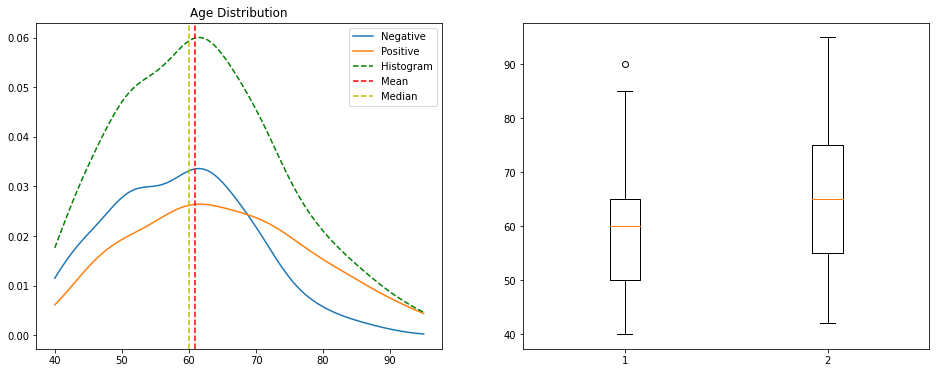

In [11]:
plot_distribution(df, 'age')

>> ### Creatinine Phosphokinase
>> this feature that we observe is having almost the same distribution on two classes. so we can say that the creatinine phosphokinase is not having any correlation with the target.
>> but still i will give this feature some change to continue into feature selection. so for now i will transform it into more normal distribution.

Grubbs Statistic: 7.515
Critical Value: 3.723
Reject Null Hypothesis, H1 : Sample contains outliers


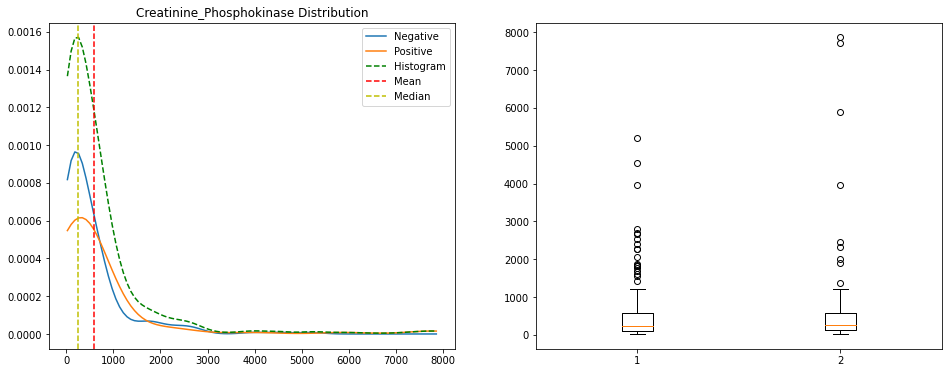

In [12]:
plot_distribution(df, 'creatinine_phosphokinase')

>> ### Ejection Fraction
>> this feature represents the ejection fraction of the patient. this feature may have some probabilistic difference between the positive and negative class.
>> the positive class are more likely have lower ejection fraction than the negative class. so we can say that the ejection fraction is having some correlation with the target.

Grubbs Statistic: 3.548
Critical Value: 3.723
Accept Null Hypothesis, H0 : Sample doesn't contain outliers


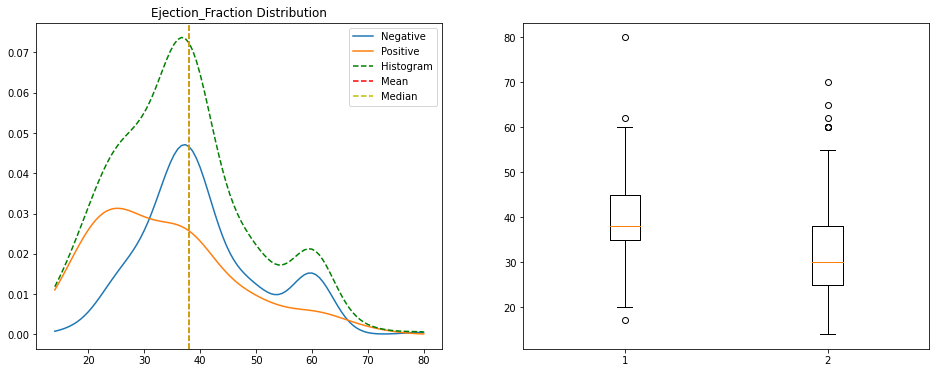

In [13]:
plot_distribution(df, 'ejection_fraction')

>> ### Platelets
>> from the first sight this feature is a normal distribution but after splitting the classes we can see that the distribution is overlapping. and that not good for our model. because we need that class are distributed differently and not overlaping too much.

Grubbs Statistic: 6.008
Critical Value: 3.723
Reject Null Hypothesis, H1 : Sample contains outliers


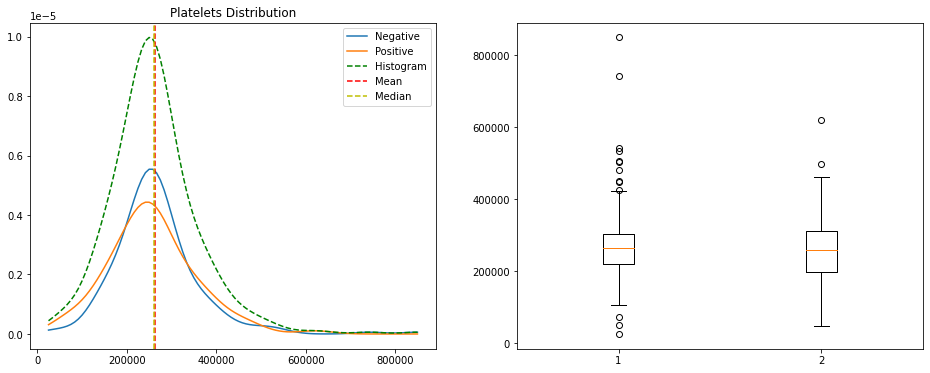

In [14]:
plot_distribution(df, 'platelets')

>> ### Serum Creatinine
>> this feature is about , from the visualisation we can see that the classes distribution have some overlap but they have diffrent mean  and some region they were not overlaping that much.

Grubbs Statistic: 7.752
Critical Value: 3.723
Reject Null Hypothesis, H1 : Sample contains outliers


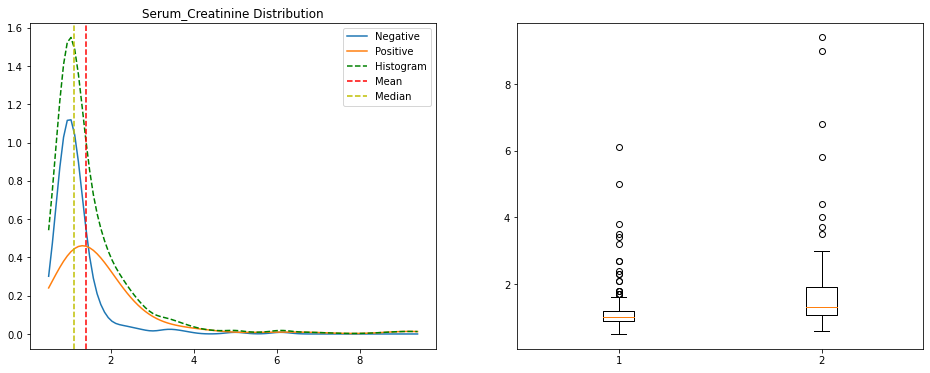

In [15]:
plot_distribution(df, 'serum_creatinine')

>> ### Serum Sodium
>> from the visualisation we can see that `serum_sodium` feature has good enough distribution on the target class we can say so because there are only one peak of distribution for each class, and they are different mean. so we can conclude that this feature is one of the most important feature for our model.

Grubbs Statistic: 5.363
Critical Value: 3.723
Reject Null Hypothesis, H1 : Sample contains outliers


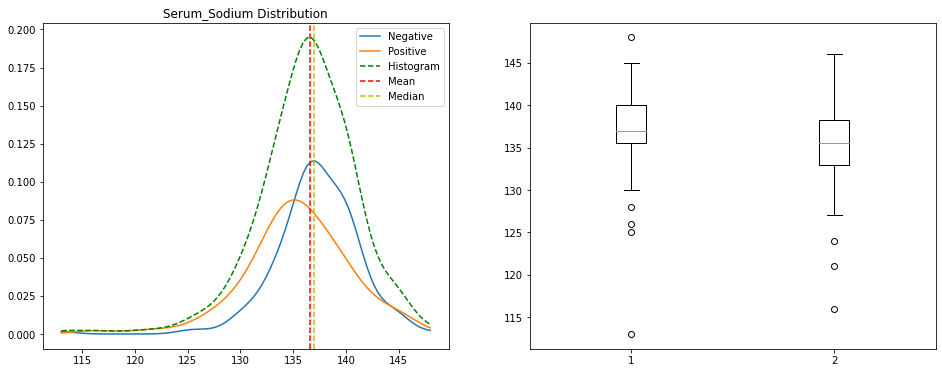

In [16]:
plot_distribution(df, 'serum_sodium')

>> ### Time
>> I still don't have good understanding about this column represent because this column has very high correlation to the target but how that happened is still a missing part. but if i found out this feature is impossible to obtain before the end of patient life i will need to drop this feature to make this dataset more realistic.

Grubbs Statistic: 1.997
Critical Value: 3.723
Accept Null Hypothesis, H0 : Sample doesn't contain outliers


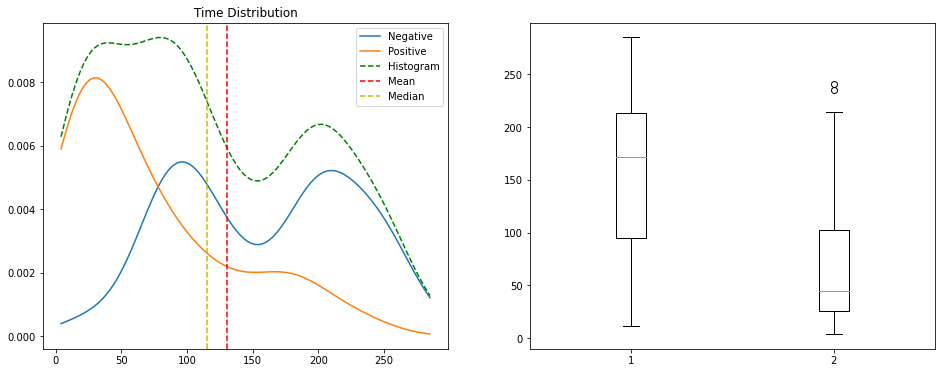

In [17]:
plot_distribution(df, 'time')

> ## Categorical Features
> Because this dataset only contain binary category we will be observing them all at once to save some time.

In [18]:
def plot_categorical_dist(df, columns: list, target='DEATH_EVENT'):
    fig, ax = plt.subplots(1, len(columns), figsize=(8 * len(columns), 6))

    for i, column in enumerate(columns):
        ax[i].set_title(column)
        ax[i].hist(df[df[target] == 0][column], bins=2, histtype='step', label='Negative', density=True)
        ax[i].hist(df[df[target] == 1][column], bins=2, histtype='step', label='Positive', density=True)
        ax[i].legend()

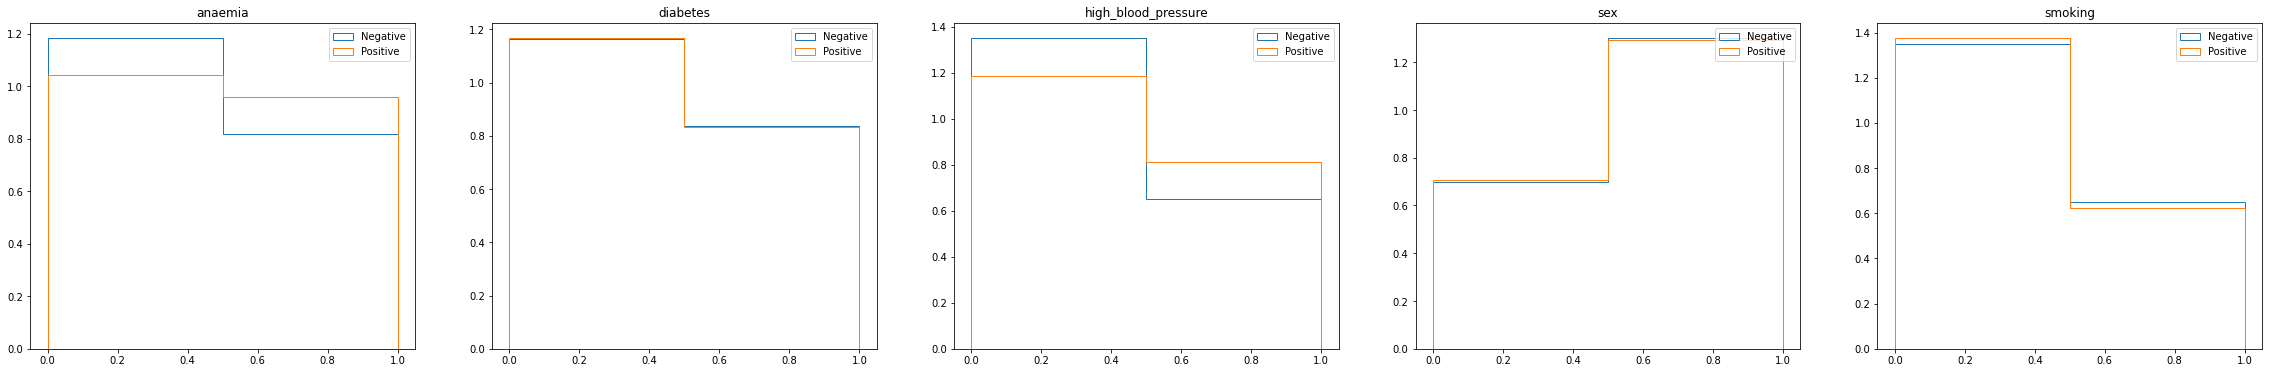

In [19]:
plot_categorical_dist(df, ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'])

>> From the plot we can see that those categorical column that we have is not giving us good correlation to the target because they are overlying probability on the 2 classes, but I will judge what important and not from the correlation ranking to make it fair and not biased on my perspective.

> ## Feature Correlation
> after we investigate on the individual level of our feature we will try to find the correlation in between variable to if they contain the same information.
> but from our observation i don't see feature that have too strong correlation to the other feature there was only one feature that have .45 correlation to other feature that is `sex` and `smoking` but is still not convince me that they are not carrying additional information individually so in this case I will keep the column if the column has enough correlation to the target

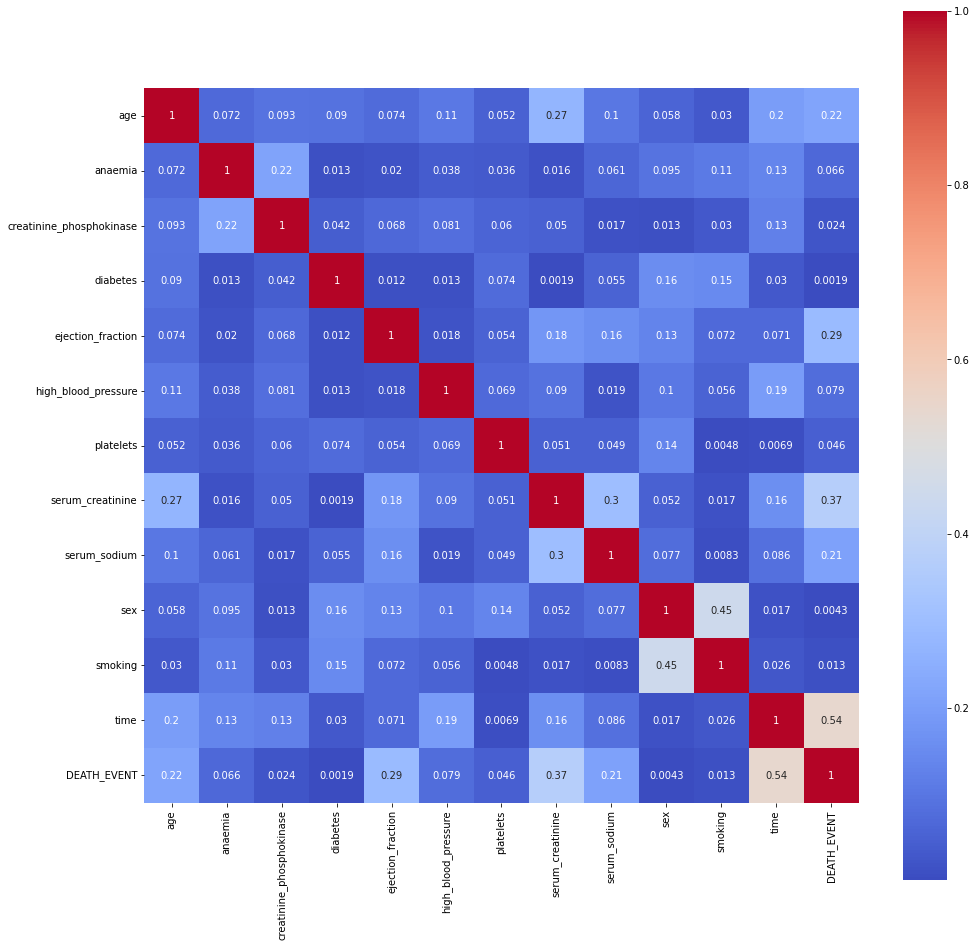

In [20]:
_df = df.copy()
_df[_df.select_dtypes('category').columns] = _df[_df.select_dtypes('category').columns].apply(lambda col: col.cat.codes)
_corr = _df.corr(method='spearman').abs()

plt.figure(figsize=(8 * 2, 8 * 2))
sns.heatmap(_corr, cmap='coolwarm', annot=True, square=True);

> ## Feature Selection
> in this section i will pin down the most important feature to train our model so the model will be slim and not overfitting.
> as we can see that there are only 5 column that have a reasonable correlation to the target.
> so i will keep the following column:
> - ~~time~~
> - serum_creatinine
> - ejection_fraction
> - age
> - serum_sodium

> **Side Note**:
> After some information was discovered i will drop the time column because it was impossible to obtain that information before the end of patient life or at the prediction time.

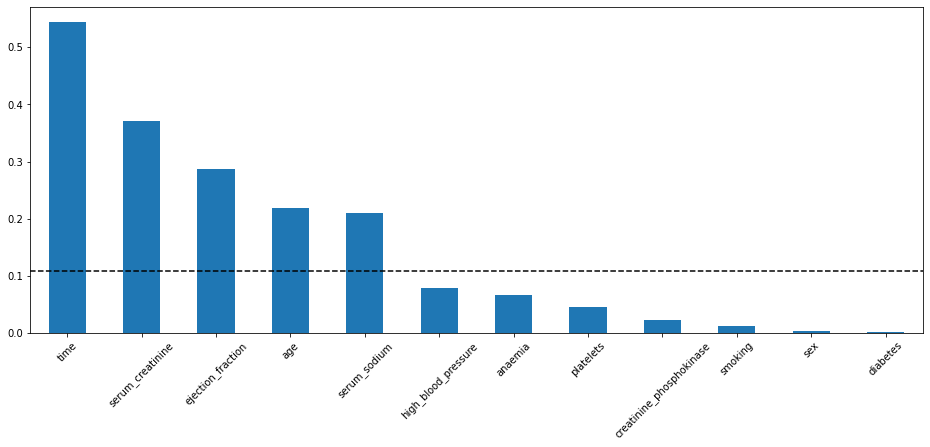

In [21]:
_corr = _df.corr(method='spearman').abs()['DEATH_EVENT'].sort_values(ascending=False).drop('DEATH_EVENT')
lower_corr_threshold = _corr.max() / 5

plt.figure(figsize=(8 * 2, 6))

_corr.plot.bar()
plt.axhline(lower_corr_threshold, color='black', linestyle='--')
plt.xticks(rotation=45);

# V. Data Preprocessing
> After every feature has been analyzed, and we have decided what feature we want to keep, we will start to preprocess the data.
> because this project require us to use tree base model i will not perform any standardization on the data because it doesn't make sense for the tree model.

In [22]:
selected_features = ['serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium']
preprocessing_pipeline = ColumnTransformer([('feature', 'passthrough', selected_features)])

create_pipeline = lambda model: Pipeline(
    [
        ('preprocessing', preprocessing_pipeline),
        ('model', model)
    ]
)

> ## Cross Validation Split
> in this section we will split our data into 3 parts and those part are train, validation and test and try to keep the proportion of each part to be the same.

In [23]:
x = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed, stratify=y_train)

> from this we can see that the dataset that we split only contain few sample inside the train, validation and test part.

In [24]:
print(f"x_train: {x_train.shape}")
print(f"x_val: {x_val.shape}")
print(f"x_test: {x_test.shape}")

x_train: (215, 12)
x_val: (54, 12)
x_test: (30, 12)


In [25]:
train_ds, val_ds, test_ds = (x_train, y_train), (x_val, y_val), (x_test, y_test)

# VI. Model Definition
> it's time to define our model.
> i will define 2 model for this dataset one is Random Forest and on is Gradient Boosting.

> **Random Forest**
> Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

> **Gradient Boosting**
> Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees. When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest. A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.

> since we're only using 2 model i will try to find the best parameters for each model.

In [26]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=seed,
)

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=9,
    min_samples_leaf=5,
    min_samples_split=7,
    max_features='sqrt',
    random_state=seed,
)

gb_model = create_pipeline(gb_model)
rf_model = create_pipeline(rf_model)

# VII. Model Training


In [27]:
def find_hyper_parameter(model, param_grid, dataset):
    grid_search = GridSearchCV(
        model,
        param_grid=param_grid,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(*dataset)
    return grid_search.best_estimator_, grid_search.cv_results_

> let's start by hyperparameter tuning. in here we declare n_estimators and max_depth. to get the best of our model in this dataset

In [28]:
rf_params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
}

gb_params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
}

In [29]:
rf_model, rf_scores = find_hyper_parameter(rf_model, rf_params, train_ds)
gb_model, gb_scores = find_hyper_parameter(gb_model, gb_params, train_ds)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


> and here are the best param that get from the search above

In [30]:
rf_model[-1], gb_model[-1]

(RandomForestClassifier(max_depth=3, random_state=13),
 GradientBoostingClassifier(max_features='sqrt', min_samples_leaf=5,
                            min_samples_split=7, random_state=13))

> ## Grid Search Score
> from this metric alone i can say that the model was performing well but similar to the other model.

In [31]:
print(f"Random Forest: Score - {np.mean(rf_scores['mean_test_score']):.3f}, Var - {np.mean(rf_scores['std_test_score']):.3f}")

Random Forest: Score - 0.779, Var - 0.063


In [32]:
print(f"Gradient Boost: Score - {np.mean(gb_scores['mean_test_score']):.3f}, Var - {np.mean(gb_scores['std_test_score']):.3f}")

Gradient Boost: Score - 0.726, Var - 0.049


# VIII. Model Evaluation
> after all was trained i will evaluate the model and see which one is the best. and continue tune the model to complete our objective.
> and i will use `mae` and `mse` to measure the loss for each model and use `acc`, `prec`, `recall` and `f1` to measure the performance of the model.

In [33]:
def calculate_metrics(model, dataset: (x, y), prefix, threshold=0.5):
    x, y = dataset
    _y = model.predict_proba(x)[:, 1]
    _y = _y > threshold

    acc = metrics.accuracy_score(y, _y)
    f1 = metrics.f1_score(y, _y)
    prec = metrics.precision_score(y, _y)
    rec = metrics.recall_score(y, _y)

    mse = metrics.mean_squared_error(y, _y)
    mae = metrics.mean_absolute_error(y, _y)

    print(f"""{prefix}
    Accuracy : {acc:.2f}, F1 : {f1:.2f}, Precision : {prec:.2f}, Recall : {rec:.2f}
    MSE : {mse:.2f}, MAE : {mae:.2f}
    """)

In [34]:
def display_roc(model, dataset: (x, y), name, ax=plt):
    x, y = dataset
    _y = model.predict_proba(x)[:, 1]
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
    metrics.RocCurveDisplay.from_predictions(y, _y, name=name, ax=ax)

In [35]:
def plot_precision_recall(model, dataset: (x, y), name, ax=plt):
    x, y = dataset
    _y = model.predict_proba(x)[:, 1]
    ax.plot([0, 1], [1, 0], color='gray', linestyle='--')
    metrics.PrecisionRecallDisplay.from_predictions(y, _y, name=name, ax=ax)

In [36]:
def plot_precision_recall_space(model, dataset: (x, y), name):
    x, y = dataset
    _y = model.predict_proba(x)[:, 1]

    reports = []

    for t in np.arange(0, 1, .01):
        output = _y > t

        precision = metrics.precision_score(y, output, zero_division=0)
        recall = metrics.recall_score(y, output, zero_division=0)

        reports.append({
            'treshold': t,
            'precision': precision,
            'recall': recall,
        })

    reports = pd.DataFrame(reports)
    plt.figure(figsize=(8, 6))
    plt.plot(reports['treshold'], reports['precision'], label='Precision')
    plt.plot(reports['treshold'], reports['recall'], label='Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title(name)
    plt.legend()

    return reports

> ## Cross Validation

>> ### Random Forest
>> as we can see that this model was performing well in fact not overfitting to the data. and this was good indication that the model will perform well in the future.

In [37]:
calculate_metrics(rf_model, dataset=train_ds, prefix='Random Forest - Train')
calculate_metrics(rf_model, dataset=val_ds, prefix='Random Forest - Validation')

Random Forest - Train
    Accuracy : 0.82, F1 : 0.67, Precision : 0.83, Recall : 0.57
    MSE : 0.18, MAE : 0.18
    
Random Forest - Validation
    Accuracy : 0.80, F1 : 0.56, Precision : 0.88, Recall : 0.41
    MSE : 0.20, MAE : 0.20
    


>> ### Gradient Boost
>> this model was performed exceptionally well in the training but from what we can ee that the model is not very accurate on the validation dataset this because the common tree base model problem that it always over-fit the data.

In [38]:
calculate_metrics(gb_model, dataset=train_ds, prefix='Gradient Boosting - Train')
calculate_metrics(gb_model, dataset=val_ds, prefix='Gradient Boosting - Validation')

Gradient Boosting - Train
    Accuracy : 0.90, F1 : 0.83, Precision : 0.90, Recall : 0.77
    MSE : 0.10, MAE : 0.10
    
Gradient Boosting - Validation
    Accuracy : 0.80, F1 : 0.65, Precision : 0.71, Recall : 0.59
    MSE : 0.20, MAE : 0.20
    


> ## AUC-ROC and Precision-Recall Curve
> after judging th model performance with the number alone we will see if my statement before still hold true in this Curve.
> as we can see both model almost perform the same but i will choose the Random Forest model because it is simpler model and AUC-ROC performance is better that Gradient Boosting.
> so after this i will only continue with random forest model.

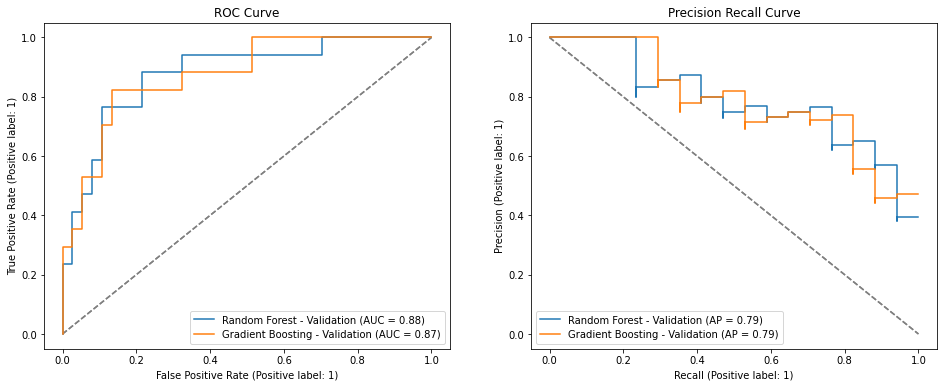

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(8 * 2, 6))

display_roc(rf_model, dataset=val_ds, name='Random Forest - Validation', ax=ax[0])
display_roc(gb_model, dataset=val_ds, name='Gradient Boosting - Validation', ax=ax[0])

plot_precision_recall(rf_model, dataset=val_ds, name='Random Forest - Validation', ax=ax[1])
plot_precision_recall(gb_model, dataset=val_ds, name='Gradient Boosting - Validation', ax=ax[1])

ax[0].set_title('ROC Curve')
ax[1].set_title('Precision Recall Curve');

> ## Threshold Selection
> okay after we see how our model perform on those metrics we need a way to implement the model into our problem domain, so what our problem is? we need to catch as many critical patient before anything bad can happen to them. so i will trade my precision for the recall. in this case 80% recall will be good because how the model perform on the AUC ROC before

> let's start by sweeping the threshold from 0 to 1 and calculate the recall for each threshold. then choose the correct value of threshold that maximize the recall.

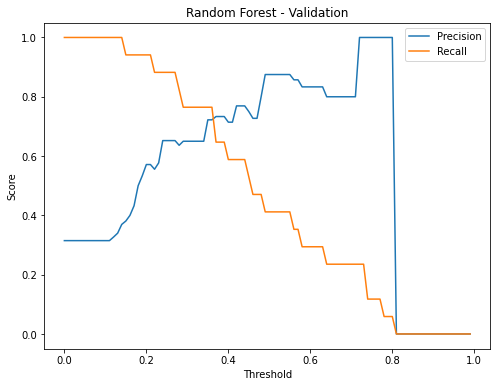

In [40]:
scores = plot_precision_recall_space(rf_model, dataset=val_ds, name='Random Forest - Validation')

> okay after reeding the threshold selection we can see that the threshold that maximize the recall is 0.2 why those value because when we draw a straight line from y=0 to y=1 we can see that the recall is 1. and the precision is .33. so the threshold that maximize the recall is 0.2. but is my judgement correct? we neet to plot and calculate the precision and recall from the selected threshold.

In [41]:
threshold = .2

<Figure size 576x432 with 0 Axes>

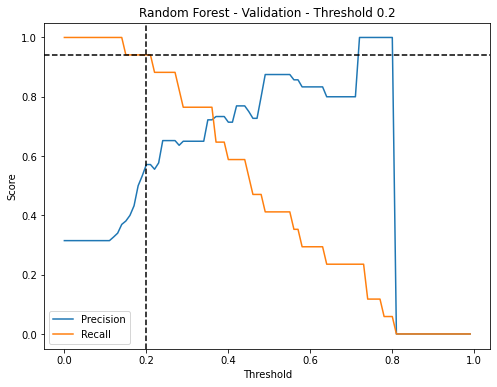

In [42]:
plt.figure(figsize=(8, 6))
plot_precision_recall_space(rf_model, dataset=val_ds, name=f'Random Forest - Validation - Threshold {threshold}')
plt.axvline(x=threshold, color='k', linestyle='--')
plt.axhline(.94, color='k', linestyle='--')
plt.legend()
plt.show();

In [43]:
_y = rf_model.predict_proba(x_val)[:, 1] > threshold
print(classification_report(y_val, _y))

              precision    recall  f1-score   support

           0       0.96      0.68      0.79        37
           1       0.57      0.94      0.71        17

    accuracy                           0.76        54
   macro avg       0.77      0.81      0.75        54
weighted avg       0.84      0.76      0.77        54



> ## Conclusion
> from the new line that we draw and from the numerical calculation we can see that our previous assumption is correct. that we will have around 94% recall and 57% precision. so let's start a simulation to see how our model perform in the real world.

# IX. Model Inference
> in this section we will perform the simulation on the real world when we are facing the problem in the wild let's say we have 30 patients and we need to catch them who hast higher risk of being death in the near future because hearth problem. and from our simulation data we can see that they consist of 20 negative patients and 10 positive patients. and we need to catch the positive patient.

In [44]:
print(f"Total Patient : {len(x_test)}")
print(f"Negative Patient : {len(y_test[y_test == 0])}")
print(f"Positive Patient : {len(y_test[y_test == 1])}")

Total Patient : 30
Negative Patient : 20
Positive Patient : 10


> prepare the dataset to mare readable format for us to analyze

In [45]:
_x_test = x_test.copy()
_x_test['actual'] = np.asarray(y_test, bool)
_x_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,actual
45,50.000,0,582,1,38,0,310000.00,1.90,135,1,1,35,True
270,44.000,0,582,1,30,1,263358.03,1.60,130,1,1,244,False
53,70.000,1,69,1,50,1,351000.00,1.00,134,0,0,44,True
122,60.000,0,96,1,38,0,228000.00,0.75,140,0,0,95,False
248,40.000,0,624,0,35,0,301000.00,1.00,142,1,1,214,False
216,70.000,0,1202,0,50,1,358000.00,0.90,141,0,0,196,False
79,55.000,0,336,0,45,1,324000.00,0.90,140,0,0,74,False
281,70.000,0,582,0,40,0,51000.00,2.70,136,1,1,250,False
242,40.000,0,90,0,35,0,255000.00,1.10,136,1,1,212,False
296,45.000,0,2060,1,60,0,742000.00,0.80,138,0,0,278,False


> perform the probability prediction to each one of the patient

In [46]:
_x_test = x_test.copy()
_x_test['prediction'] = rf_model.predict_proba(_x_test)[:, 1] > threshold

> shortlist the patient that has the highest probability of being positive and quarantine them, so we can have better chance to catch when they heart start to fail and treat it before it too late. as we can see the model was predicting that from the 30 patient only 15 of the has higher probability of being positive and need some medical observation.

In [47]:
_x_test['actual'] = np.asarray(y_test, bool)
_y_test = y_test[_x_test['prediction'] == True]
_x_test = _x_test[_x_test['prediction'] == True]
_x_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,prediction,actual
45,50.000,0,582,1,38,0,310000.00,1.9,135,1,1,35,True,True
270,44.000,0,582,1,30,1,263358.03,1.6,130,1,1,244,True,False
281,70.000,0,582,0,40,0,51000.00,2.7,136,1,1,250,True,False
185,60.667,1,104,1,30,0,389000.00,1.5,136,1,0,171,True,True
37,82.000,1,855,1,50,1,321000.00,1.0,145,0,0,30,True,True
158,85.000,1,910,0,50,0,235000.00,1.3,134,1,0,121,True,False
93,60.000,1,154,0,25,0,210000.00,1.7,135,1,0,82,True,True
58,49.000,0,789,0,20,1,319000.00,1.1,136,1,1,55,True,True
217,54.000,1,427,0,70,1,151000.00,9.0,137,0,0,196,True,True
282,42.000,0,64,0,30,0,215000.00,3.8,128,1,1,250,True,False


> okay the moment of truth, lets calculate our model performance with the simulation dataset
> here are what we got from the simulation
> - we can identify 80% of the time that the patient is positive and 20% of the time that the patient is miss classified. this is a huge increase in the accuracy perspective when comparing it to a random chance
> - we can see that we are successfully shortlist the number of patient in the observation period and save the medical operation time and money by sacrificing only 20% of positive patient.

> summary :
we get almost 200% efficiency to proceed medical observation and treat the correct patient. with the accuracy of 80%

In [48]:
print(f"Total Observation : {len(_y_test)}")
print(f"Actual Negative Observation : {len(_y_test[(y_test == 0)])}")
print(f"Actual Positive Observation : {len(_y_test[(y_test == 1)])}")
print()
print(f"Efficiency : {len(y_test) / len(_y_test) * 100 :.0f} %")
print(f"Life Saved :  {len(_y_test[(y_test == 1)]) / len(y_test[y_test == 1]) * 100 :.0f} %")

Total Observation : 15
Actual Negative Observation : 7
Actual Positive Observation : 8

Efficiency : 200 %
Life Saved :  80 %


# X. Conclusion
> from the journey that we take before we can conclude many thing like from the EDA we can say that many column that are likely to be relevant to the target at logic level do not actually correlate with the target, in example in my first thingking I think there will be huge correlation between hypertension and heart disease. but from statistical analysis that was not the fact because we cannot distinguish between the two from just one feature. and it is important to drop the time column because it was impossible to obtain at the time of prediction because it was the time of death of the patient.

> then from the model selection and performance analysis we can conclude something interesting that more advance model is not always the best model. like in my case i found out that the boosted tree that we implement is not perform significantly better than the random forest model. witch in case of architecture simpler and faster to compute

> the threshold selection give us a nice advantage in this objective by trading some precision we can get a better recall to satisfy our objective.

> from the simulation alone we can have a big impact on the 2 think one about the efficiency on medical personnel, so they dent need to keep low risk patient in the observation period, and they can save the medical operation time and money. witch in my simulation case was able to catch 8 out of 10 true positive patient.
